In [6]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import allan_variance
np.random.seed(0)
import pandas as pd
from matplotlib.ticker import ScalarFormatter

In [4]:
def read_txt(datafile):
    with open(datafile, "r") as file:
        lines = file.readlines()
        data = [[float(num) for num in line.split()] for line in lines]
    return data


In [105]:
EKF = np.array(read_txt("../data/EKF.txt"))
UKF = np.array(read_txt("../data/UKF.txt"))
dt = 0.01

DISIMU omega hat: quantization    0.00000000000000
white           0.00002430852560
flicker         0.00034736963815
walk            0.00077140628731
ramp            0.00007345375292
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00045439695920
walk            0.00045355760759
ramp            0.00000000000000
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000425418037
flicker         0.00043645393838
walk            0.00059625635238
ramp            0.00000000000000
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00242890484837
walk            0.02185470706660
ramp            0.00000000000000
Name: 0, dtype: float64, quantization    0.00000597149049
white           0.00000000000000
flicker         0.00000000000000
walk            0.02477413816550
ramp            0.00559368573407
Name: 0, dtype: float64, quantization    0.00000000000000

(array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01]),
 [Text(0, 1e-09, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 1e-05, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.0001, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$')])

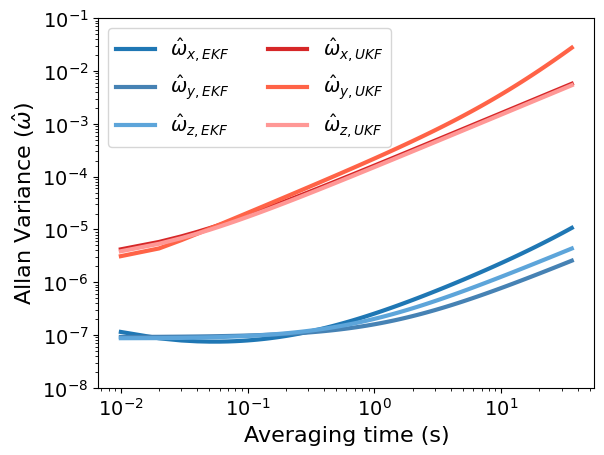

In [115]:
# DISIMU, omega hat
tau_wx_EKF, avar_wx_EKF = allan_variance.compute_avar(EKF[:,0], dt)
tau_wy_EKF, avar_wy_EKF = allan_variance.compute_avar(EKF[:,1], dt)
tau_wz_EKF, avar_wz_EKF = allan_variance.compute_avar(EKF[:,2], dt)
tau_wx_UKF, avar_wx_UKF = allan_variance.compute_avar(UKF[:,0], dt)
tau_wy_UKF, avar_wy_UKF = allan_variance.compute_avar(UKF[:,1], dt)
tau_wz_UKF, avar_wz_UKF = allan_variance.compute_avar(UKF[:,2], dt)
params_wx_EKF, avar_pred_wx_EKF = allan_variance.estimate_parameters(tau_wx_EKF, avar_wx_EKF)
params_wy_EKF, avar_pred_wy_EKF = allan_variance.estimate_parameters(tau_wy_EKF, avar_wy_EKF)
params_wz_EKF, avar_pred_wz_EKF = allan_variance.estimate_parameters(tau_wz_EKF, avar_wz_EKF)
params_wx_UKF, avar_pred_wx_UKF = allan_variance.estimate_parameters(tau_wx_UKF, avar_wx_UKF)
params_wy_UKF, avar_pred_wy_UKF = allan_variance.estimate_parameters(tau_wy_UKF, avar_wy_UKF)
params_wz_UKF, avar_pred_wz_UKF = allan_variance.estimate_parameters(tau_wz_UKF, avar_wz_UKF)
print(f"DISIMU omega hat: {params_wx_EKF}, {params_wy_EKF}, {params_wz_EKF}, {params_wx_UKF}, {params_wy_UKF}, {params_wz_UKF}")

# Computed
fig, ax = plt.subplots()
plt.loglog(tau_wx_EKF, avar_pred_wx_EKF, label="$\hat{\omega}_{x,EKF}$", linewidth=3, color = "#1f77b4")
plt.loglog(tau_wy_EKF, avar_pred_wy_EKF, label="$\hat{\omega}_{y,EKF}$", linewidth=3, color = "#4682b4")
plt.loglog(tau_wz_EKF, avar_pred_wz_EKF, label="$\hat{\omega}_{z,EKF}$", linewidth=3, color = "#5da5da")
plt.loglog(tau_wx_UKF, avar_pred_wx_UKF, label="$\hat{\omega}_{x,UKF}$", linewidth=3, color = "#d62728")
plt.loglog(tau_wy_UKF, avar_pred_wy_UKF, label="$\hat{\omega}_{y,UKF}$", linewidth=3, color = "#ff6347")
plt.loglog(tau_wz_UKF, avar_pred_wz_UKF, label="$\hat{\omega}_{z,UKF}$", linewidth=3, color = "#ff9896")

plt.ylim([1e-8, 1e-1])

plt.legend(ncol=2, fancybox=True, frameon=True, fontsize=14, loc='upper left')
plt.xlabel("Averaging time (s)", fontsize=16)
plt.ylabel("Allan Variance ($\hat{\omega}$)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

DISIMU omega hat: quantization    0.00000000000000
white           0.00000000000000
flicker         0.00000000000000
walk            0.00006924493721
ramp            0.00018925570948
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00000000000000
walk            0.00003186770586
ramp            0.00012409610740
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00000000000000
walk            0.00003319321684
ramp            0.00011174336932
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00010019946922
walk            0.00095660446945
ramp            0.00007125720153
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000315304203
flicker         0.00005672055631
walk            0.00096677068214
ramp            0.00015310500236
Name: 0, dtype: float64, quantization    0.00000000000000

(array([1.e-14, 1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00,
        1.e+02]),
 [Text(0, 1e-14, '$\\mathdefault{10^{-14}}$'),
  Text(0, 1e-12, '$\\mathdefault{10^{-12}}$'),
  Text(0, 1e-10, '$\\mathdefault{10^{-10}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 0.0001, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

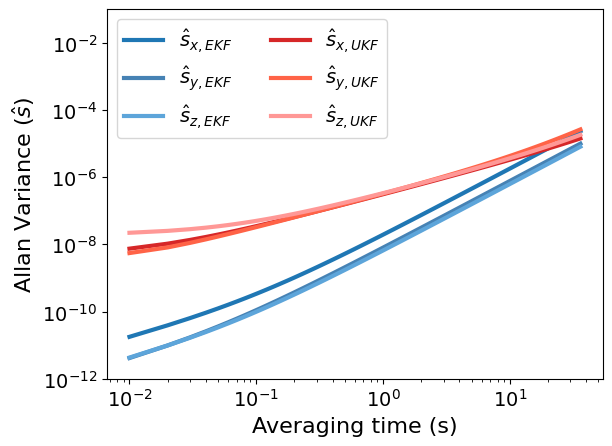

In [118]:
# DISIMU, omega hat
tau_wx_EKF, avar_wx_EKF = allan_variance.compute_avar(EKF[:,6], dt)
tau_wy_EKF, avar_wy_EKF = allan_variance.compute_avar(EKF[:,7], dt)
tau_wz_EKF, avar_wz_EKF = allan_variance.compute_avar(EKF[:,8], dt)
tau_wx_UKF, avar_wx_UKF = allan_variance.compute_avar(UKF[:,6], dt)
tau_wy_UKF, avar_wy_UKF = allan_variance.compute_avar(UKF[:,7], dt)
tau_wz_UKF, avar_wz_UKF = allan_variance.compute_avar(UKF[:,8], dt)
params_wx_EKF, avar_pred_wx_EKF = allan_variance.estimate_parameters(tau_wx_EKF, avar_wx_EKF)
params_wy_EKF, avar_pred_wy_EKF = allan_variance.estimate_parameters(tau_wy_EKF, avar_wy_EKF)
params_wz_EKF, avar_pred_wz_EKF = allan_variance.estimate_parameters(tau_wz_EKF, avar_wz_EKF)
params_wx_UKF, avar_pred_wx_UKF = allan_variance.estimate_parameters(tau_wx_UKF, avar_wx_UKF)
params_wy_UKF, avar_pred_wy_UKF = allan_variance.estimate_parameters(tau_wy_UKF, avar_wy_UKF)
params_wz_UKF, avar_pred_wz_UKF = allan_variance.estimate_parameters(tau_wz_UKF, avar_wz_UKF)
print(f"DISIMU omega hat: {params_wx_EKF}, {params_wy_EKF}, {params_wz_EKF}, {params_wx_UKF}, {params_wy_UKF}, {params_wz_UKF}")

# Computed
fig, ax = plt.subplots()
plt.loglog(tau_wx_EKF, avar_pred_wx_EKF, label="$\hat{s}_{x,EKF}$", linewidth=3, color = "#1f77b4")
plt.loglog(tau_wy_EKF, avar_pred_wy_EKF, label="$\hat{s}_{y,EKF}$", linewidth=3, color = "#4682b4")
plt.loglog(tau_wz_EKF, avar_pred_wz_EKF, label="$\hat{s}_{z,EKF}$", linewidth=3, color = "#5da5da")
plt.loglog(tau_wx_UKF, avar_pred_wx_UKF, label="$\hat{s}_{x,UKF}$", linewidth=3, color = "#d62728")
plt.loglog(tau_wy_UKF, avar_pred_wy_UKF, label="$\hat{s}_{y,UKF}$", linewidth=3, color = "#ff6347")
plt.loglog(tau_wz_UKF, avar_pred_wz_UKF, label="$\hat{s}_{z,UKF}$", linewidth=3, color = "#ff9896")

plt.ylim([1e-12, 1e-1])

plt.legend(ncol=2, fancybox=True, frameon=True, fontsize=14, loc='upper left')
plt.xlabel("Averaging time (s)", fontsize=16)
plt.ylabel("Allan Variance ($\hat{s}$)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [46]:
w_x_WN_EKF = [1.07e-3, 1.14e-3, 1.17e-3, 1.15e-3, 1.17e-3, 1.17e-3]
w_y_WN_EKF = [1.02e-3, 1.10e-3, 1.12e-3, 1.13e-3, 1.15e-3, 1.15e-3]
w_z_WN_EKF = [1.06e-3, 1.13e-3, 1.19e-3, 1.17e-3, 1.17e-3, 1.18e-3]
w_x_RW_EKF = [      0,       0,       0,       0,       0,       0]
w_y_RW_EKF = [      0,       0,       0,       0,       0,       0]
w_z_RW_EKF = [      0,       0,       0,       0,       0,       0]
s_x_WN_EKF = [      0,       0,       0,       0,       0,       0]
s_y_WN_EKF = [      0,       0,       0,       0,       0,       0]
s_z_WN_EKF = [      0,       0,       0,       0,       0,       0]
s_x_RW_EKF = [5.86e-4, 8.82e-4, 4.33e-4, 3.22e-4, 2.86e-4, 2.49e-4]
s_y_RW_EKF = [9.38e-4, 1.14e-3, 8.28e-4, 7.77e-4, 2.86e-4, 4.31e-4]
s_z_RW_EKF = [1.06e-3, 1.61e-3, 1.64e-3, 6.54e-3, 3.27e-3, 1.88e-3]

w_x_WN_UKF = [2.74e-4, 2.28e-4, 2.72e-4, 2.54e-4, 2.71e-4, 2.70e-4]
w_y_WN_UKF = [2.34e-4, 2.32e-4, 2.45e-4, 2.41e-4, 2.26e-4, 2.37e-4]
w_z_WN_UKF = [4.51e-6, 1.02e-5, 2.58e-6, 2.94e-6, 5.32e-6, 3.97e-6]
w_x_RW_UKF = [5.67e-3, 4.93e-3, 5.79e-3, 5.66e-3, 5.97e-3, 6.15e-3]
w_y_RW_UKF = [5.03e-3, 5.03e-3, 5.14e-3, 5.40e-3, 5.04e-3, 5.46e-3]
w_z_RW_UKF = [4.28e-5, 3.18e-5, 4.22e-5, 3.98e-5, 3.27e-5, 2.61e-5]
s_x_WN_UKF = [9.37e-5, 9.03e-5, 8.75e-5, 8.39e-5, 9.04e-5, 8.99e-5]
s_y_WN_UKF = [1.98e-4, 2.68e-4, 2.77e-4, 2.02e-4, 2.54e-4, 2.71e-4]
s_z_WN_UKF = [      0,       0,       0,       0,       0,       0]
s_x_RW_UKF = [2.06e-3, 2.02e-3, 1.86e-3, 1.78e-3, 2.02e-3, 2.09e-3]
s_y_RW_UKF = [4.20e-3, 5.46e-3, 5.98e-3, 4.14e-3, 5.35e-3, 5.93e-3]
s_z_RW_UKF = [6.09e-3, 6.28e-3, 7.15e-3, 6.51e-3, 7.51e-3, 6.78e-3]

x = [1, 2, 3, 4, 5, 6]

Text(0, 0.5, '$\\hat{\\omega}$ ($^{o}/s$)')

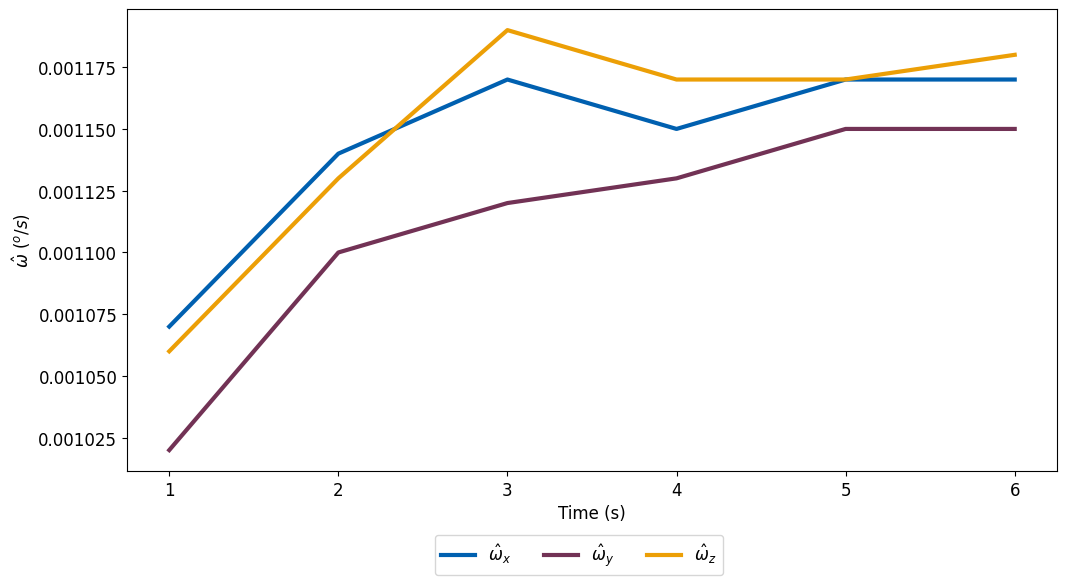

In [52]:
fig1, ax1 = plt.subplots(figsize = (12, 6))
ax1.plot(x, w_x_WN_EKF, linewidth=3, color = "#0060B0", label = "$\hat{\omega}_x$")
ax1.plot(x, w_y_WN_EKF, linewidth=3, color = "#723255", label = "$\hat{\omega}_y$")
ax1.plot(x, w_z_WN_EKF, linewidth=3, color = "#EC9F06", label = "$\hat{\omega}_z$")
# ax1.plot(x, w_x_WN_UKF, linewidth=3, color = "#0060B0", label = "$\hat{\omega}_x$")
# ax1.plot(x, w_y_WN_UKF, linewidth=3, color = "#723255", label = "$\hat{\omega}_y$")
# ax1.plot(x, w_z_WN_UKF, linewidth=3, color = "#EC9F06", label = "$\hat{\omega}_z$")
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.set_ylim([-0.005, 0.005])
ax1.legend(ncol=3, fancybox=True, frameon=True, fontsize=12, bbox_to_anchor=(0.65, -0.12))
ax1.set_xlabel("Time (s)", fontsize=12)
ax1.set_ylabel("$\hat{\omega}$ ($^{o}/s$)", fontsize=12)

Text(0, 0.5, '$\\hat{\\omega}$ ($^{o}/s$)')

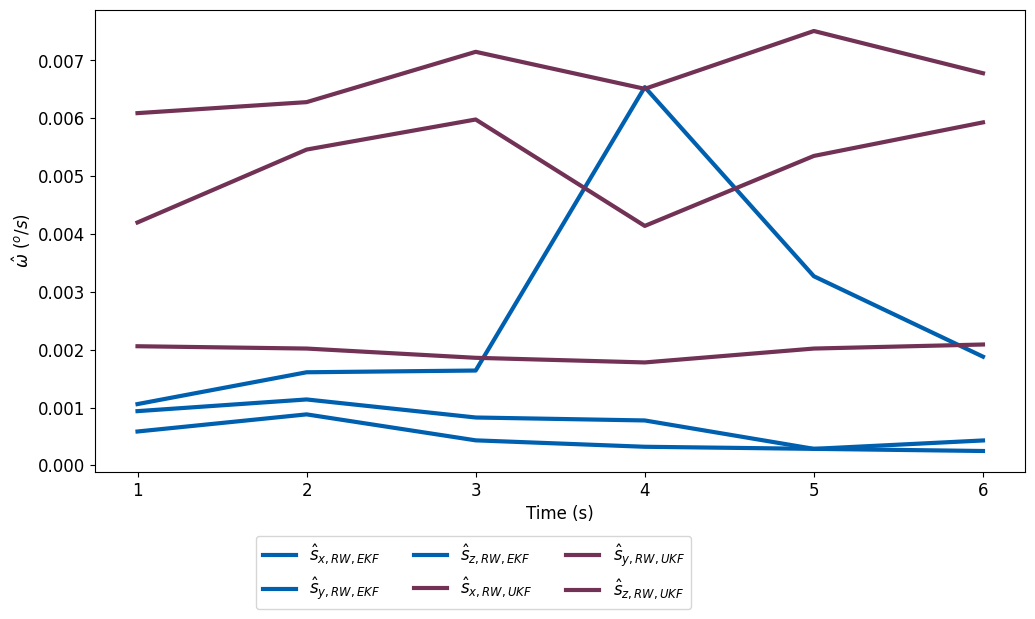

In [51]:
fig1, ax1 = plt.subplots(figsize = (12, 6))
ax1.plot(x, s_x_RW_EKF, linewidth=3, color = "#0060B0", label = "$\hat{s}_{x,RW,EKF}$")
ax1.plot(x, s_y_RW_EKF, linewidth=3, color = "#0060B0", label = "$\hat{s}_{y,RW,EKF}$")
ax1.plot(x, s_z_RW_EKF, linewidth=3, color = "#0060B0", label = "$\hat{s}_{z,RW,EKF}$")
ax1.plot(x, s_x_RW_UKF, linewidth=3, color = "#723255", label = "$\hat{s}_{x,RW,UKF}$")
ax1.plot(x, s_y_RW_UKF, linewidth=3, color = "#723255", label = "$\hat{s}_{y,RW,UKF}$")
ax1.plot(x, s_z_RW_UKF, linewidth=3, color = "#723255", label = "$\hat{s}_{z,RW,UKF}$")
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.set_ylim([-0.005, 0.005])
ax1.legend(ncol=3, fancybox=True, frameon=True, fontsize=12, bbox_to_anchor=(0.65, -0.12))
ax1.set_xlabel("Time (s)", fontsize=12)
ax1.set_ylabel("$\hat{\omega}$ ($^{o}/s$)", fontsize=12)

Simulation

In [57]:
# w_x_WN_EKF = [      0, 1.61e-4,       0, 1.15e-3,       0,       0, 2.09e-4, 1.49e-4]
# w_y_WN_EKF = [      0,       0,       0,       0,       0, 1.70e-4, 1.82e-4, 1.52e-4]
# w_z_WN_EKF = [      0, 4.70e-5, 3.08e-5, 1.22e-4, 1.11e-4, 1.02e-4, 2.19e-4, 1.66e-4]
# w_x_RW_EKF = [2.36e-2, 1.28e-2, 1.35e-2, 1.10e-2, 7.46e-3, 5.71e-3, 3.37e-4, 2.47e-3]
# w_y_RW_EKF = [2.19e-2, 1.76e-2, 1.32e-2, 1.08e-2, 8.41e-3, 7.40e-3, 3.51e-3, 2.51e-3]
# w_z_RW_EKF = [2.66e-2, 1.86e-2, 1.62e-2, 1.32e-2, 8.14e-3, 7.61e-3, 4.07e-3, 2.43e-3]
# s_x_WN_EKF = [      0,       0,       0,       0,       0,       0,       0,       0]
# s_y_WN_EKF = [      0,       0,       0,       0,       0,       0,       0,       0]
# s_z_WN_EKF = [      0,       0,       0,       0,       0,       0,       0,       0]
# s_x_RW_EKF = [3.52e-5, 8.53e-5, 7.65e-5, 5.44e-5, 7.32e-5, 9.83e-5, 9.07e-5, 1.21e-4]
# s_y_RW_EKF = [4.16e-5, 3.88e-5, 4.57e-5, 4.58e-5, 1.10e-4, 8.02e-5, 1.08e-4, 1.27e-4]
# s_z_RW_EKF = [5.45e-5, 4.41e-5, 5.57e-5, 4.94e-5, 8.40e-5, 9.57e-5, 9.99e-5, 1.38e-4]

# w_x_WN_UKF = [      0,       0,       0,       0,       0,       0,       0,       0]
# w_y_WN_UKF = [2.90e-4, 2.60e-4, 2.90e-4, 2.71e-4, 2.65e-4, 2.15e-4, 8.53e-5,       0]
# w_z_WN_UKF = [      0,       0,       0,       0,       0,       0,       0,       0]
# w_x_RW_UKF = [2.12e-2, 2.36e-2, 2.33e-2, 2.09e-2, 2.13e-2, 2.15e-2, 2.27e-2, 3.22e-2]
# w_y_RW_UKF = [2.86e-2, 2.71e-2, 2.48e-2, 2.38e-2, 2.26e-2, 2.29e-2, 2.16e-2, 2.16e-2]
# w_z_RW_UKF = [2.44e-2, 2.41e-2, 2.26e-2, 2.13e-2, 1.99e-2, 1.96e-2, 1.91e-2, 1.96e-2]
# s_x_WN_UKF = [6.62e-6, 7.59e-6,       0,       0,       0, 6.96e-6, 9.47e-6,       0]
# s_y_WN_UKF = [8.87e-6, 1.06e-5, 1.03e-5, 1.07e-5, 9.80e-6, 1.03e-5, 1.08e-5, 1.12e-5]
# s_z_WN_UKF = [      0,       0,       0, 1.74e-6, 9.55e-6, 1.32e-5, 3.63e-5, 5.23e-5]
# s_x_RW_UKF = [9.61e-4, 9.44e-4, 9.48e-4, 9.49e-4, 9.41e-4, 9.44e-4, 9.85e-4, 1.08e-3]
# s_y_RW_UKF = [9.68e-4, 9.73e-4, 9.67e-4, 9.70e-4, 9.59e-4, 9.69e-4, 9.97e-4, 1.06e-3]
# s_z_RW_UKF = [9.75e-4, 9.84e-4, 9.57e-4, 9.49e-4, 9.51e-4, 9.82e-4, 1.26e-3, 1.74e-3]

x = [1, 2, 3, 4, 5, 6, 12, 18]

w_x_WN_EKF = [3.28e-3, 2.20e-3, 1.68e-3, 1.37e-3, 1.04e-3, 1.01e-3, 6.37e-4, 5.81e-4]
w_y_WN_EKF = [3.16e-3, 2.22e-3, 1.83e-3, 1.55e-3, 1.37e-3, 1.24e-3, 8.02e-4, 5.93e-4]
w_z_WN_EKF = [3.03e-3, 2.04e-3, 1.53e-3, 1.58e-3, 1.34e-3, 1.21e-3, 7.23e-4, 4.96e-4]
w_x_RW_EKF = [1.86e-2, 1.10e-2, 8.43e-3, 6.62e-3, 5.58e-3, 5.63e-3, 3.63e-3, 3.31e-3]
w_y_RW_EKF = [2.06e-2, 1.34e-2, 1.07e-2, 9.28e-3, 8.12e-3, 6.94e-3, 4.57e-3, 3.12e-3]
w_z_RW_EKF = [1.62e-2, 1.04e-2, 7.88e-3, 8.51e-3, 7.07e-3, 6.36e-3, 3.61e-3, 2.76e-3]
s_x_WN_EKF = [3.88e-3, 3.01e-3, 2.60e-3, 2.30e-3, 2.06e-3, 1.87e-3, 1.35e-3, 1.13e-3]
s_y_WN_EKF = [3.86e-3, 3.11e-3, 2.59e-3, 2.29e-3, 2.10e-3, 1.91e-3, 1.37e-3, 1.12e-3]
s_z_WN_EKF = [3.89e-3, 3.03e-3, 2.56e-3, 2.24e-3, 1.95e-3, 1.83e-3, 1.33e-3, 1.03e-3]
s_x_RW_EKF = [7.55e-3, 4.97e-3, 4.68e-3, 4.11e-3, 3.73e-3, 3.35e-3, 2.52e-3, 2.37e-3]
s_y_RW_EKF = [8.76e-3, 5.76e-3, 4.06e-3, 3.41e-3, 3.98e-3, 3.43e-3, 2.80e-3, 2.33e-3]
s_z_RW_EKF = [1.14e-2, 4.06e-3, 3.10e-3, 2.74e-3, 2.42e-3, 2.40e-3, 2.36e-3, 1.92e-3]

w_x_WN_UKF = [3.52e-3,       0,       0,       0,       0,       0,       0,       0]
w_y_WN_UKF = [3.51e-3, 2.64e-3, 2.43e-3, 2.10e-3, 1.86e-3, 1.38e-3, 6.23e-4, 5.47e-4]
w_z_WN_UKF = [3.50e-3,       0,       0,       0,       0,       0,       0,       0]
w_x_RW_UKF = [1.33e-1, 1.33e-1, 1.35e-1, 1.29e-1, 1.33e-1, 2.37e-2, 2.26e-2, 2.37e-2]
w_y_RW_UKF = [1.60e-1, 1.62e-1, 1.61e-1, 1.56e-1, 1.56e-1, 1.61e-1, 1.64e-1, 1.69e-1]
w_z_RW_UKF = [1.31e-1, 1.29e-1, 1.28e-1, 1.20e-1, 1.20e-1, 1.22e-1, 1.20e-1, 1.22e-1]
s_x_WN_UKF = [3.65e-3, 2.60e-3, 2.29e-3, 2.11e-3, 1.81e-3, 1.72e-3, 5.36e-4,       0]
s_y_WN_UKF = [3.77e-3, 2.92e-3, 2.50e-3, 2.27e-3, 2.12e-3, 1.91e-3, 1.28e-3,       0]
s_z_WN_UKF = [5.87e-3, 5.24e-3, 5.30e-3, 5.01e-3, 3.83e-3,       0,       0,       0]
s_x_RW_UKF = [6.93e-2, 6.49e-2, 6.39e-2, 6.17e-2, 6.12e-2, 6.30e-2, 6.49e-2, 6.64e-2]
s_y_RW_UKF = [6.84e-2, 6.69e-2, 6.44e-2, 6.22e-2, 6.22e-2, 6.25e-2, 6.32e-2, 6.32e-2]
s_z_RW_UKF = [6.69e-2, 8.89e-2, 9.35e-2, 9.91e-2, 1.26e-1, 1.43e-1, 2.30e-1, 2.59e-1]

/tmp/ipykernel_5106/702002834.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=14)


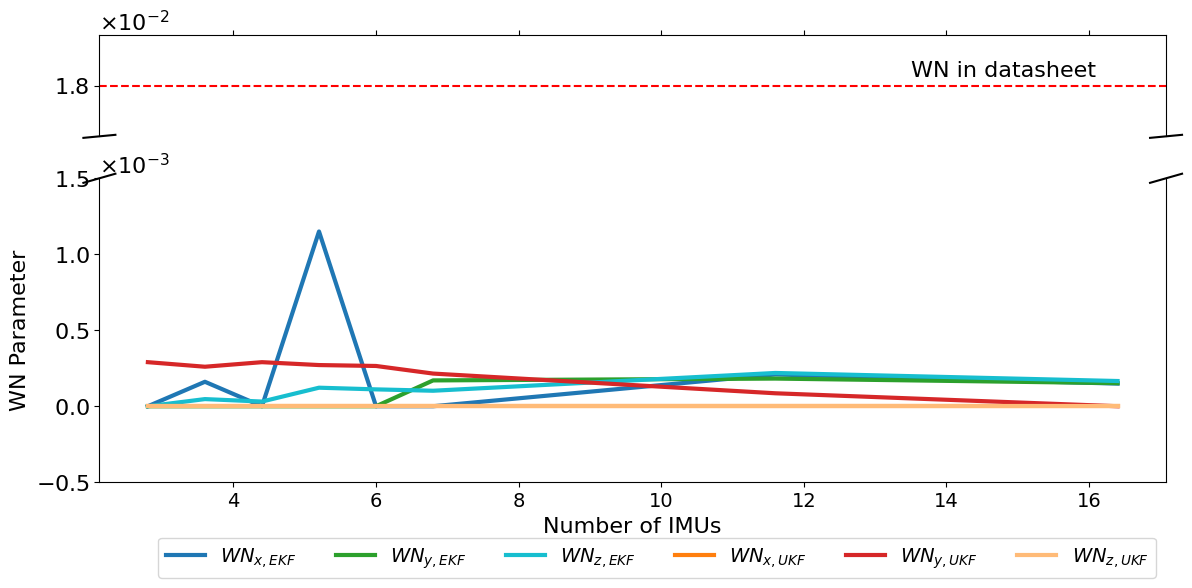

In [99]:
from matplotlib.ticker import ScalarFormatter

# Create two subplots with shared x-axis (broken axis)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# Top plot (for the higher part)
ax1.axhline(y=1.8e-2, color='r', linestyle='--', label='WN in datasheet')
ax1.set_ylim(1.7e-2, 1.9e-2)  # Set y-limits for zoomed-in top part
ax1.set_yticks([1.8e-2])  # Only show the dashed line value for clarity
ax1.tick_params(axis='y', labelsize=16)
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(16)
ax1.text(16, 1.8e-2 + 0.0001, "WN in datasheet", color="k", fontsize=16, 
         ha="center", va="bottom")

# Bottom plot (for the lower part)
ax2.plot(x, w_x_WN_EKF, linewidth=3, color = "#1f77b4", label = "$WN_{x,EKF}$")
ax2.plot(x, w_y_WN_EKF, linewidth=3, color = "#4682b4", label = "$WN_{y,EKF}$")
ax2.plot(x, w_z_WN_EKF, linewidth=3, color = "#5da5da", label = "$WN_{z,EKF}$")
ax2.plot(x, w_x_WN_UKF, linewidth=3, color = "#d62728", label = "$WN_{x,UKF}$")
ax2.plot(x, w_y_WN_UKF, linewidth=3, color = "#ff6347", label = "$WN_{y,UKF}$")
ax2.plot(x, w_z_WN_UKF, linewidth=3, color = "#ff9896", label = "$WN_{z,UKF}$")
ax2.set_ylim(-5e-4, 1.5e-3)  # Set y-limits for the lower plot
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_xticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=14)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.yaxis.get_offset_text().set_fontsize(16)

# Legend
ax2.legend(ncol=6, fancybox=True, frameon=True, fontsize=14, bbox_to_anchor=(1, -0.15))

# Axis labels
ax2.set_xlabel("Number of IMUs", fontsize=16)
ax2.set_ylabel("WN Parameter", fontsize=16)

# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # Don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Add diagonal lines to indicate a "break" between plots
d = 0.015  # Diagonal line length
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_6362/2777405099.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

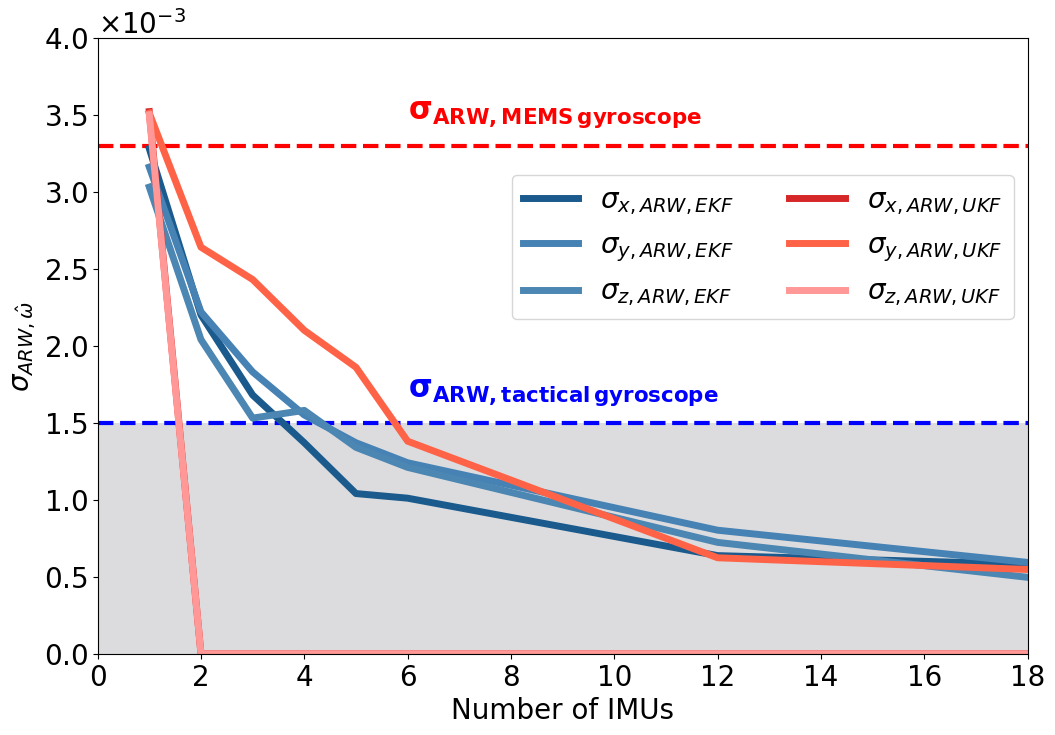

In [149]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=3.3e-3, color='r', linestyle='--', linewidth=3)
plt.axhline(y=1.5e-3, color='b', linestyle='--', linewidth=3)
ax1.plot(x, w_x_WN_EKF, linewidth=5, color = "#1a5a8d", label = "$\sigma_{x,ARW,EKF}$")
ax1.plot(x, w_y_WN_EKF, linewidth=5, color = "#4682b4", label = "$\sigma_{y,ARW,EKF}$")
ax1.plot(x, w_z_WN_EKF, linewidth=5, color = "#4c86b2", label = "$\sigma_{z,ARW,EKF}$")
ax1.plot(x, w_x_WN_UKF, linewidth=5, color = "#d62728", label = "$\sigma_{x,ARW,UKF}$")
ax1.plot(x, w_y_WN_UKF, linewidth=5, color = "#ff6347", label = "$\sigma_{y,ARW,UKF}$")
ax1.plot(x, w_z_WN_UKF, linewidth=5, color = "#ff9896", label = "$\sigma_{z,ARW,UKF}$")
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=2, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(1, 0.8))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{ARW,\hat\omega}$", fontsize=20)
ax1.text(6, 1.6e-3, "$\mathbf{\sigma_{ARW, tactical\, gyroscope}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(6, 3.4e-3, "$\mathbf{\sigma_{ARW, MEMS\, gyroscope}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=1.5e-3, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 0.4e-2])
ax1.set_xlim([0, 18])


/tmp/ipykernel_6362/2557770180.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

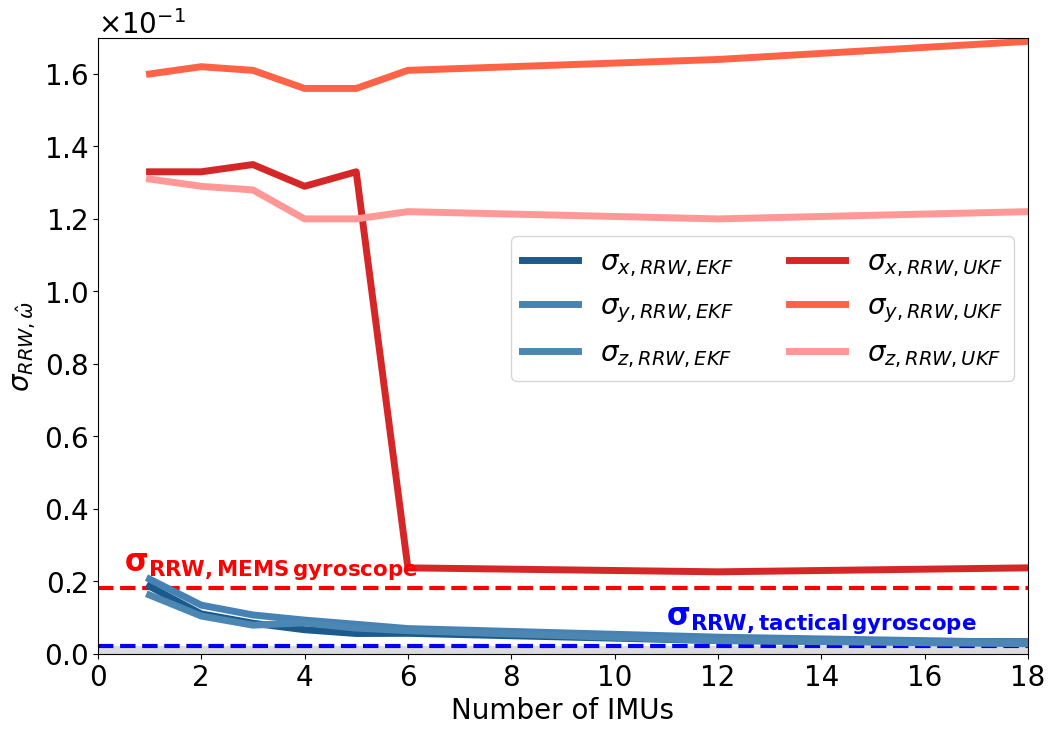

In [148]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=0.018, color='r', linestyle='--', linewidth=3)
plt.axhline(y=2e-3, color='b', linestyle='--', linewidth=3)
ax1.plot(x, w_x_RW_EKF, linewidth=5, color = "#1a5a8d", label = "$\sigma_{x,RRW,EKF}$")
ax1.plot(x, w_y_RW_EKF, linewidth=5, color = "#4682b4", label = "$\sigma_{y,RRW,EKF}$")
ax1.plot(x, w_z_RW_EKF, linewidth=5, color = "#4c86b2", label = "$\sigma_{z,RRW,EKF}$")
ax1.plot(x, w_x_RW_UKF, linewidth=5, color = "#d62728", label = "$\sigma_{x,RRW,UKF}$")
ax1.plot(x, w_y_RW_UKF, linewidth=5, color = "#ff6347", label = "$\sigma_{y,RRW,UKF}$")
ax1.plot(x, w_z_RW_UKF, linewidth=5, color = "#ff9896", label = "$\sigma_{z,RRW,UKF}$")
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=2, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(1, 0.7))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{RRW,\hat\omega}$", fontsize=20)
ax1.text(11, 5e-3, "$\mathbf{\sigma_{RRW, tactical\, gyroscope}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(0.5, 0.020, "$\mathbf{\sigma_{RRW, MEMS\, gyroscope}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=2e-3, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 0.17])
ax1.set_xlim([0, 18])


/tmp/ipykernel_6362/1024140392.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

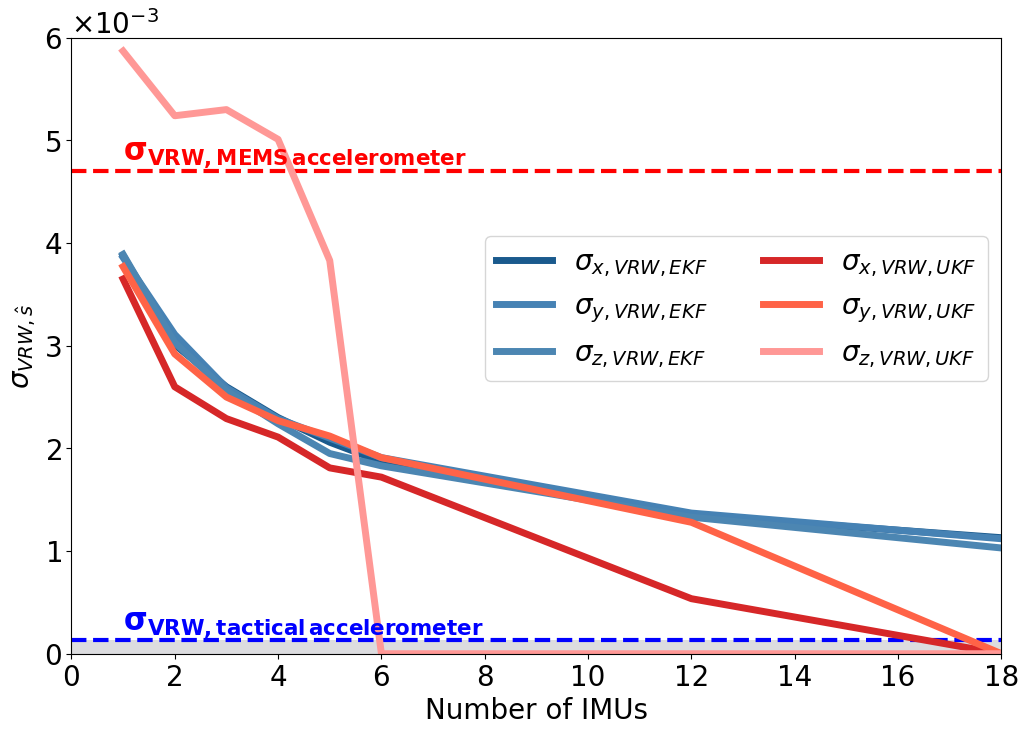

In [147]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=4.7e-3, color='r', linestyle='--', linewidth=3)
plt.axhline(y=1.3e-4, color='b', linestyle='--', linewidth=3)
ax1.plot(x, s_x_WN_EKF, linewidth=5, color = "#1a5a8d", label = "$\sigma_{x,VRW,EKF}$")
ax1.plot(x, s_y_WN_EKF, linewidth=5, color = "#4682b4", label = "$\sigma_{y,VRW,EKF}$")
ax1.plot(x, s_z_WN_EKF, linewidth=5, color = "#4c86b2", label = "$\sigma_{z,VRW,EKF}$")
ax1.plot(x, s_x_WN_UKF, linewidth=5, color = "#d62728", label = "$\sigma_{x,VRW,UKF}$")
ax1.plot(x, s_y_WN_UKF, linewidth=5, color = "#ff6347", label = "$\sigma_{y,VRW,UKF}$")
ax1.plot(x, s_z_WN_UKF, linewidth=5, color = "#ff9896", label = "$\sigma_{z,VRW,UKF}$")
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=2, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(1, 0.7))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{VRW,\hat{s}}$", fontsize=20)
ax1.text(1, 1.31e-4, "$\mathbf{\sigma_{VRW, tactical\,accelerometer}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(1, 4.71e-3, "$\mathbf{\sigma_{VRW, MEMS\, accelerometer}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=1.3e-4, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 0.6e-2])
ax1.set_xlim([0, 18])

/tmp/ipykernel_6362/248311374.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)


(0.0, 18.0)

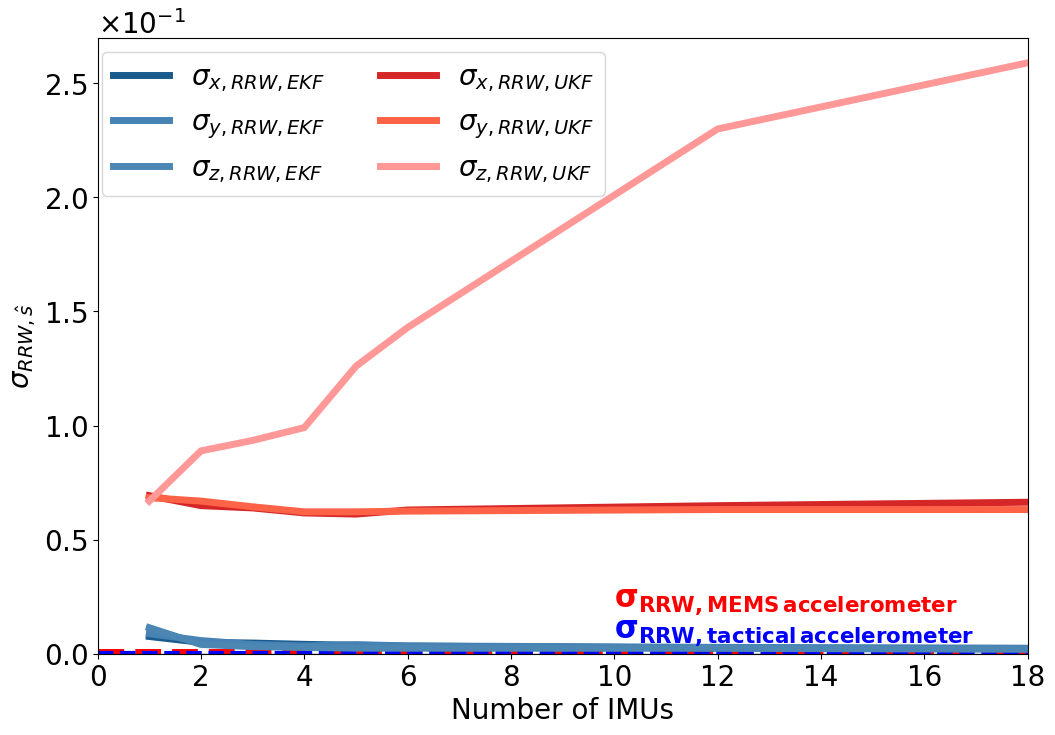

In [150]:
fig1, ax1 = plt.subplots(figsize = (12, 8))
plt.axhline(y=7.36e-4, color='r', linestyle='--', linewidth=5)
plt.axhline(y=1.57e-4, color='b', linestyle='--', linewidth=3)
ax1.plot(x, s_x_RW_EKF, linewidth=5, color = "#1a5a8d", label = "$\sigma_{x,RRW,EKF}$")
ax1.plot(x, s_y_RW_EKF, linewidth=5, color = "#4682b4", label = "$\sigma_{y,RRW,EKF}$")
ax1.plot(x, s_z_RW_EKF, linewidth=5, color = "#4c86b2", label = "$\sigma_{z,RRW,EKF}$")
ax1.plot(x, s_x_RW_UKF, linewidth=5, color = "#d62728", label = "$\sigma_{x,RRW,UKF}$")
ax1.plot(x, s_y_RW_UKF, linewidth=5, color = "#ff6347", label = "$\sigma_{y,RRW,UKF}$")
ax1.plot(x, s_z_RW_UKF, linewidth=5, color = "#ff9896", label = "$\sigma_{z,RRW,UKF}$")
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(ncol=2, fancybox=True, frameon=True, fontsize=20, bbox_to_anchor=(0.56, 1))
ax1.set_xlabel("Number of IMUs", fontsize=20)
ax1.set_ylabel("$\sigma_{RRW,\hat{s}}$", fontsize=20)
ax1.text(10, 2.3e-3, "$\mathbf{\sigma_{RRW, tactical\, accelerometer}}$", color="b", fontsize=22,  ha="left", va="bottom")
ax1.text(10, 0.016, "$\mathbf{\sigma_{RRW, MEMS\, accelerometer}}$", color="r", fontsize=22,  ha="left", va="bottom")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=20)
ax1.axhspan(ymin=0, ymax=1.57e-4, facecolor='#505060', alpha=0.2)
ax1.set_ylim([0, 0.27])
ax1.set_xlim([0, 18])
